# RateBeer

In [12]:
import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\jon\\Desktop\\EPFL\\MA1\\ADA\\pro_med\\ada-2024-project-mediterranean\\src\\data\\utils.py'>

## Files loadings

In [3]:
beers_rate = pd.read_csv("../../data/Original/RateBeer/beers.csv", sep=",")
breweries_rate = pd.read_csv("../../data/Original/RateBeer/breweries.csv", sep=",")
users_rate = pd.read_csv("../../data/Original/RateBeer/users.csv", sep=",")

data = []
with open("../../data/Original/RateBeer/ratings.txt", "r", encoding="utf-8") as file:
    current_rating = {}  
    
    for line in file:
        line = line.strip()  
        if ": " in line:  
            key, value = line.split(": ", 1)
            current_rating[key] = value  
        elif not line:  
            if current_rating:
                data.append(current_rating)
                current_rating = {} 
    if current_rating:
        data.append(current_rating)

ratings_rate = pd.DataFrame(data)

## Data processing

### Beers

In [4]:
utils.dataset_information(beers_rate, "Beers_RB")



########################################################
We are starting analysing dataset Beers_RB
- Dimension of starting dataset: (442081, 14)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id               beer_name  brewery_id      brewery_name  \
0   410549       33 Export (Gabon)        3198           Sobraga   
1   105273     Castel Beer (Gabon)        3198           Sobraga   
2    19445                   Régab        3198           Sobraga   
3   155699  Ards Bally Black Stout       13538  Ards Brewing Co.   
4   239097        Ards Belfast 366       13538  Ards Brewing Co.   

                  style  nbr_ratings  overall

In [6]:
utils.ensure_col_types(beers_rate,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [7]:
beers_rate.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [9]:
beers_rate_filt = beers_rate[(beers_rate['nbr_ratings'] != 0)].copy()
beers_rate_filt['nbr_ratings'].describe()

count    396690.000000
mean         17.953752
std          85.303131
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        5272.000000
Name: nbr_ratings, dtype: float64

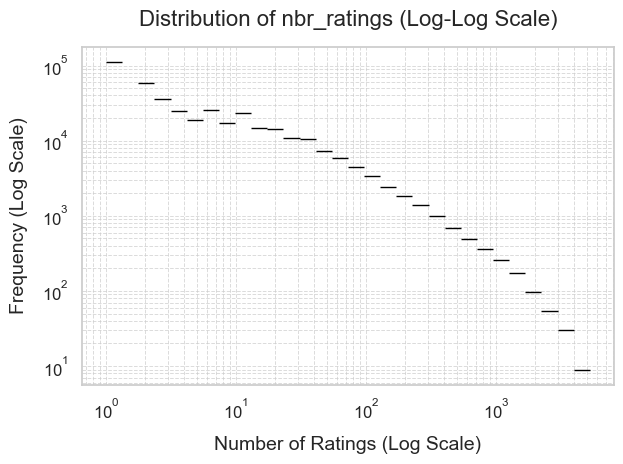

In [10]:
sns.set_theme(style="whitegrid")
sns.histplot(beers_rate_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

## Processed savings

In [14]:
utils.write_csv_into_directory('../../data/Processed/RateBeer', 'beers_processed.csv', beers_rate_filt)

Dataset successfully saved to ../../data/Processed/RateBeer\beers_processed.csv
